Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Data Preparation


Load Data, cek 5 teratas

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv", encoding='latin-1')
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


Cek jumlah kolom dan total data

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [ ]:
df.shape

(13169, 13)

Cek duplikat

In [ ]:
df.duplicated().sum()

125

Menghapus data duplikat dan memastikan data duplikat sudah tidak ada

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
df.shape

(13044, 13)

Cek Missing Values

In [ ]:
df.isna()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,False,False,False,False,False,False,False,False,False,False,False,False,False
13165,False,False,False,False,False,False,False,False,False,False,False,False,False
13166,False,False,False,False,False,False,False,False,False,False,False,False,False
13167,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()/df.shape[0]

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

Membuat kolom baru untuk  pengelompokan jenis tweet yang mengandung hate speech dan atau abusive

In [ ]:
def type(x):
    if x['HS'] == 1 and x['Abusive'] == 1:
        return 'HS & Abusive'
    elif x['HS'] == 1 and x['Abusive'] == 0:
        return 'HS'
    elif x['HS'] == 0 and x['Abusive'] == 1:
        return 'Abusive'
    else:
        return 'Neutral'

df['Type'] = df.apply(type, axis=1)
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,HS & Abusive
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,Neutral
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,Neutral
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,HS & Abusive


In [ ]:
df['Type'].value_counts()

Neutral         5783
HS & Abusive    3262
HS              2256
Abusive         1743
Name: Type, dtype: int64

Text(0.5, 1.0, 'Jenis Tweet')

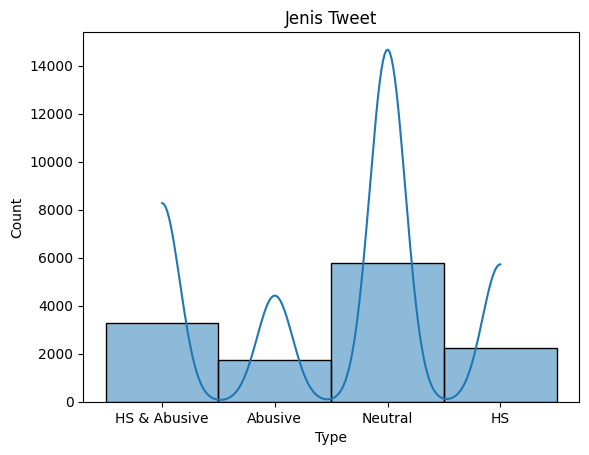

In [ ]:
sns.histplot(data=df, x="Type", kde=True, bins=25)
plt.title('Jenis Tweet')

Subject HS individual dan atau kelompok

In [ ]:
def Subject(x):
    if x['HS_Individual'] == 1 and x['HS_Group'] == 0:
        return 'Individual'
    elif x['HS_Individual'] == 0 and x['HS_Group'] == 1:
        return 'Group'
    else:
        return 'Neutral'

df['Subject'] = df.apply(Subject, axis=1)
df.head()


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Subject
0,disaat semua cowok berusaha melacak perhatian ...,1,1,1,0,0,0,0,0,1,1,0,0,Individual
1,user user siapa yang telat ngasih eluedan berg...,0,1,0,0,0,0,0,0,0,0,0,0,Neutral
2,kadang berfikir kenapa tetap percaya pada tuha...,0,0,0,0,0,0,0,0,0,0,0,0,Neutral
3,user user akunnku matamu tapi diliat dari mana,0,0,0,0,0,0,0,0,0,0,0,0,Neutral
4,user user kaum kapir udah keliatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0,Group


In [ ]:
df['Subject'].value_counts()

None          7526
Individual    3540
Group         1978
Name: Subject, dtype: int64

Text(0.5, 1.0, 'Jenis Subject')

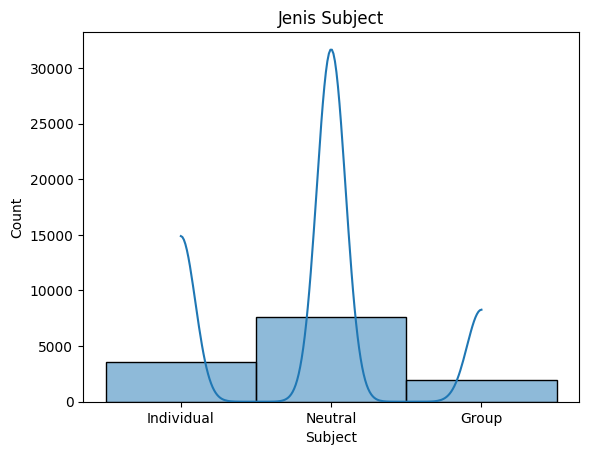

In [ ]:
sns.histplot(data=df, x="Subject", kde=True, bins=25)
plt.title('Jenis Subject')

Level HS

In [ ]:
def level(x):
    if x['HS_Weak'] == 1:
        return 'Weak'
    elif x['HS_Moderate'] == 1:
        return 'Moderate'
    elif x['HS_Strong'] == 1:
        return 'Strong'
    else:
        return 'Neutral'

df['Level'] = df.apply(level, axis = 1)
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Subject,Level
0,disaat semua cowok berusaha melacak perhatian ...,1,1,1,0,0,0,0,0,1,1,0,0,Individual,Weak
1,user user siapa yang telat ngasih eluedan berg...,0,1,0,0,0,0,0,0,0,0,0,0,Neutral,Neutral
2,kadang berfikir kenapa tetap percaya pada tuha...,0,0,0,0,0,0,0,0,0,0,0,0,Neutral,Neutral
3,user user akunnku matamu tapi diliat dari mana,0,0,0,0,0,0,0,0,0,0,0,0,Neutral,Neutral
4,user user kaum kapir udah keliatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0,Group,Moderate


In [ ]:
df['Level'].value_counts()

None        7526
Weak        3348
Moderate    1698
Strong       472
Name: Level, dtype: int64

Text(0.5, 1.0, 'Level Hate Speech')

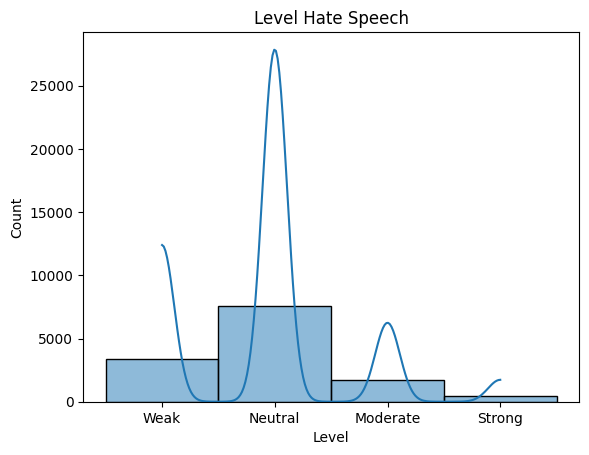

In [ ]:
sns.histplot(data=df, x="Level", kde=True, bins=25)
plt.title('Level Hate Speech')

Visualisasi level hate speech dengan subject

In [ ]:
df_none = df[-(df.Level == 'None')]


In [ ]:
df_other = df_none[-(df_none.Subject == 'Other')]

<Axes: xlabel='Subject', ylabel='Count'>

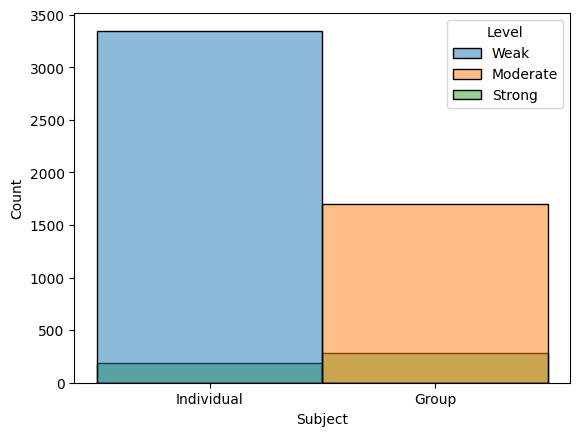

In [ ]:
sns.histplot(data=df_other, x ='Subject', hue = "Level")

<Axes: xlabel='Subject', ylabel='count'>

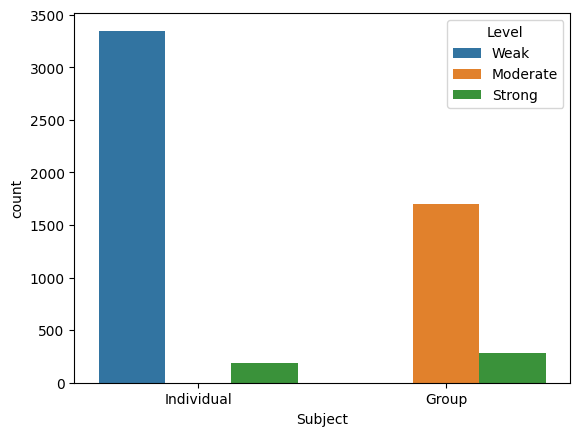

In [ ]:
sns.countplot(data=df_other, x ='Subject', hue = "Level", )

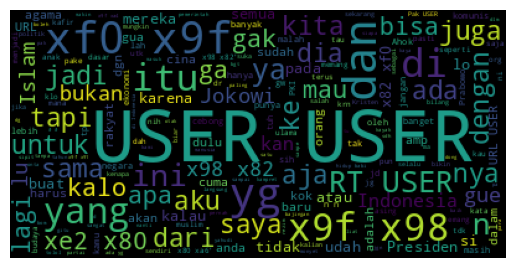

In [ ]:
text = ' '.join(df['Tweet'])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
df.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
